<a href="https://colab.research.google.com/github/Leomutz/NIDS1/blob/main/image_classification_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets
import numpy as np

In [3]:
fashion_mnist = datasets.fashion_mnist

In [4]:
(train_images,train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


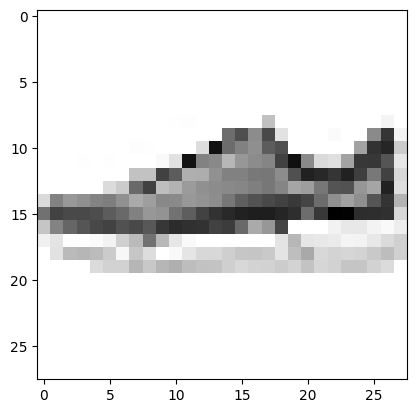

In [5]:
import matplotlib.pyplot as plt

plt.gca().grid(False)
plt.imshow(test_images[9], cmap=plt.cm.binary)

In [6]:
# normalize the values between 0 and 1
train_images = train_images/255.0
test_images = test_images/255.0

In [8]:
# create the model layers
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(56, activation='relu'),
                          keras.layers.Dense(56, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 56)                  │          43,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 56)                  │           3,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,722 (186.41 KB)

 Trainable params: 47,722 (186.41 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# fitting the model to the training data
model.fit(train_images, train_labels, epochs=6)

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7618 - loss: 0.6829
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8611 - loss: 0.3819
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8729 - loss: 0.3466
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8829 - loss: 0.3211
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8880 - loss: 0.3045
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8932 - loss: 0.2929


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Model accuracy based on test data:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8772 - loss: 0.3472
Model accuracy based on test data: 0.875


Expected label:  Coat


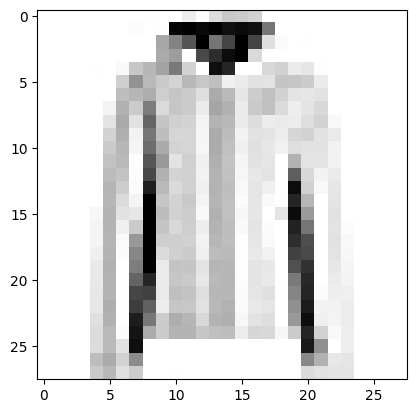

In [12]:
# test
image_num = 6
print('Expected label: ', class_names[test_labels[image_num]])
plt.imshow(test_images[image_num], cmap=plt.cm.binary)

In [13]:
# predict
predictions = model.predict(test_images)
print('Predictions for image:', predictions[image_num])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predictions for image: [9.6969183e-05 1.5712956e-04 9.1174077e-03 2.6415804e-04 9.8402345e-01
 6.3824444e-09 6.3382667e-03 5.7358246e-10 2.4911762e-06 7.8268776e-08]


In [14]:
# the output is the vector in the final layer
# softmax layer ensures all the values add up to 1
total_probability = 0
for i in range(10):
  total_probability += predictions[image_num][i]
print(total_probability)

0.9999999593627873


In [18]:
# highest prediction need to return the label
index_of_highest_pred = np.argmax(predictions[image_num])

print('Classification: ', class_names[index_of_highest_pred])
print('Confidence: ', predictions[image_num][index_of_highest_pred])

Classification:  Coat
Confidence:  0.98402345


In [19]:
# save the model
model.save('fashionMNIST.h5')